*This notebook is attempt to build a machine leaning model capable of predicting whether or not someone have heart disease based on their medical attribute.*

# Problem Definition
> Given clinincal parameter about a patient , can we predict whether or not they have heart disease?

# Data
https://archive.ics.uci.edu./ml/datasets/heart+disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score

In [3]:
data=pd.read_csv("heart-disease.csv")

In [4]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


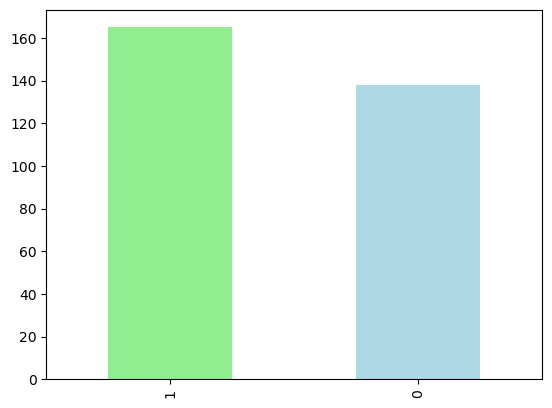

In [6]:
data["target"].value_counts().plot(kind="bar",color=["lightgreen","lightblue"]);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


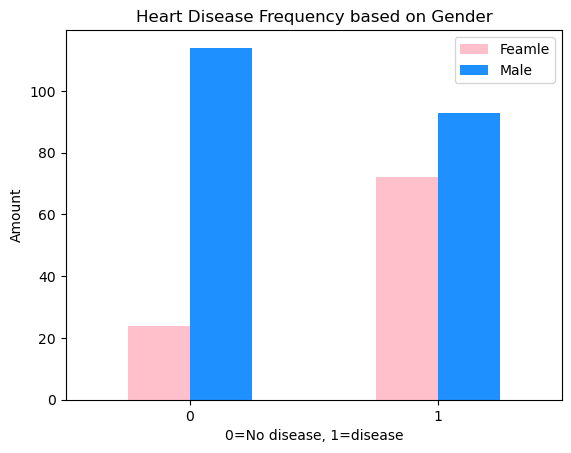

In [12]:
pd.crosstab(data.target,data.sex).plot(kind="bar",color=["pink","dodgerblue"]);
plt.title("Heart Disease Frequency based on Gender")
plt.xlabel("0=No disease, 1=disease")
plt.ylabel("Amount")
plt.legend(["Feamle","Male"]);
plt.xticks(rotation=0);

##### Age v/s max heart rate for heart disease

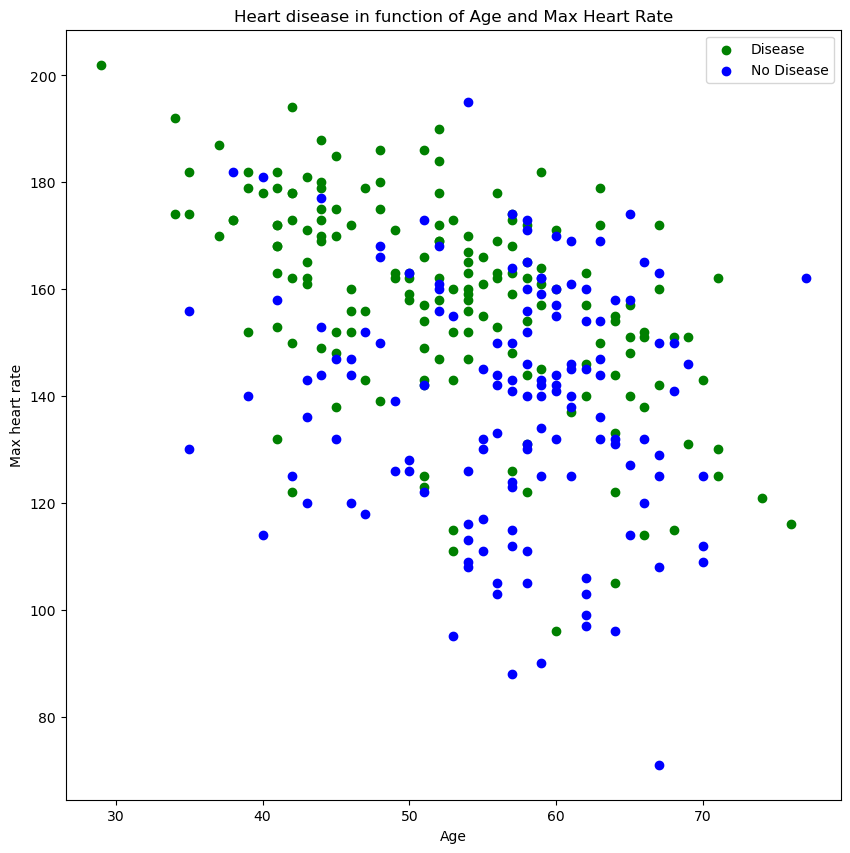

In [13]:
plt.figure(figsize=(10,10))

plt.scatter(data.age[data.target==1],data.thalach[data.target==1],
           c="green");
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],
           c="blue");
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

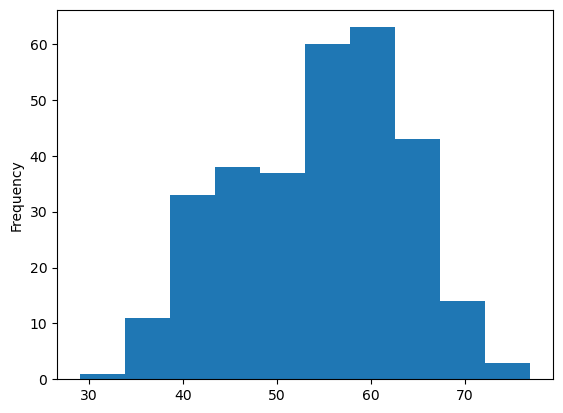

In [14]:
data.age.plot.hist();

In [15]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


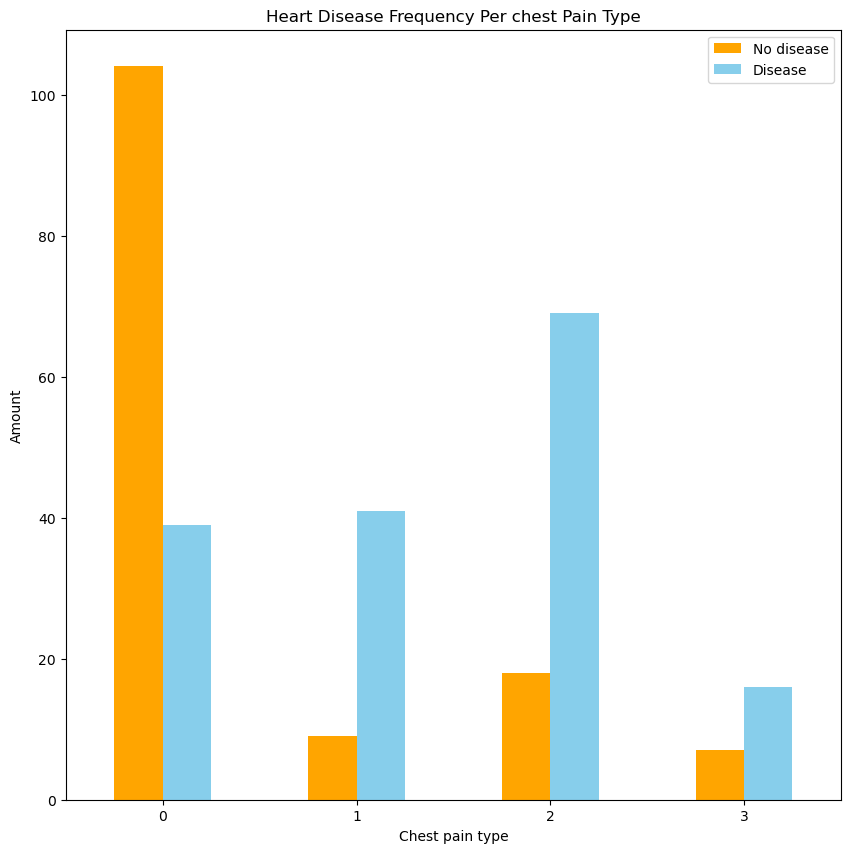

In [16]:
pd.crosstab(data.cp,data.target).plot(kind="bar",
                                     figsize=(10,10),
                                     color=["orange","skyblue"]);
plt.title("Heart Disease Frequency Per chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);


In [17]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


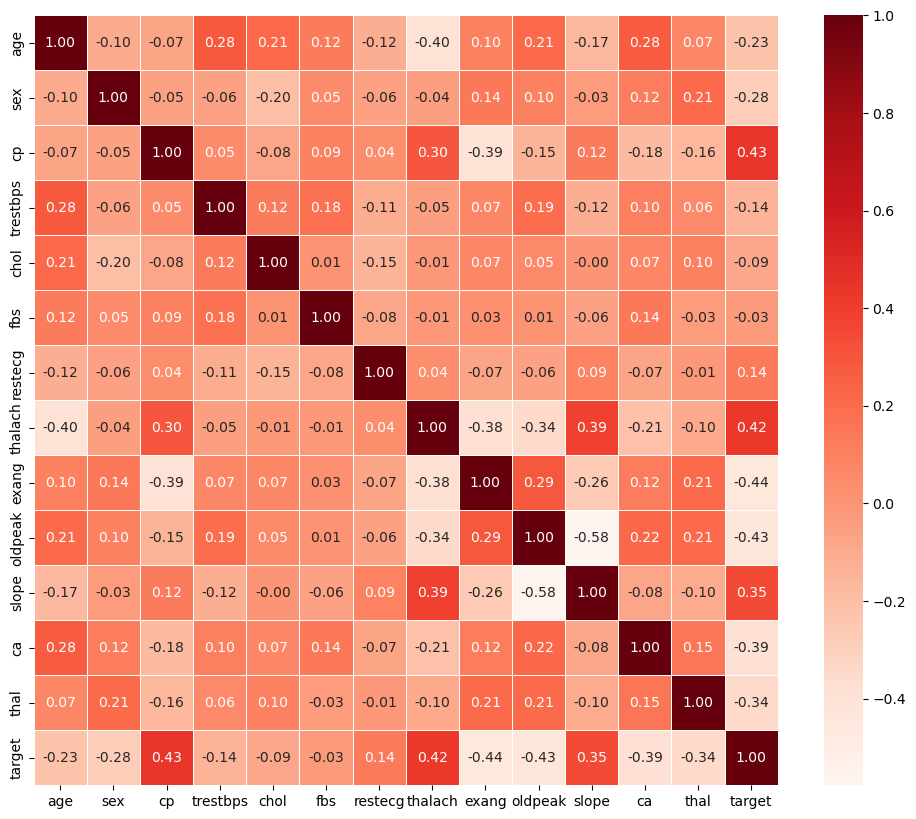

In [18]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap='Reds');

In [19]:
x=data.drop("target",axis=1)

In [20]:
y=data["target"]

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Splitting data into for training and testing. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=0.2)

In [24]:
model={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    
    model_scores={}
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        
        model_scores[name]=[model.score(x_test,y_test),model.score(x_train,y_train)]
    return model_scores

    

In [25]:
model_scores=fit_and_score(model,x_train,x_test,y_train,y_test)
print("Model_name :[Accuracy on test data, Accuracy on training data]")
for key,value in model_scores.items():
    print(key,value)

Model_name :[Accuracy on test data, Accuracy on training data]
Logistic Regression [0.8688524590163934, 0.8553719008264463]
KNN [0.6065573770491803, 0.7851239669421488]
Random Forest [0.8032786885245902, 1.0]


* model comparison

--------------------------------------------------------
--------------------------------------------------------
* Hyper parameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC cruve
* Area under the curve (AUC)

In [28]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))


In [29]:
train_scores

[1.0,
 0.8264462809917356,
 0.7851239669421488,
 0.7727272727272727,
 0.7851239669421488,
 0.8099173553719008,
 0.7603305785123967,
 0.7272727272727273,
 0.731404958677686,
 0.7272727272727273,
 0.7355371900826446,
 0.7148760330578512,
 0.743801652892562,
 0.7066115702479339,
 0.7107438016528925,
 0.7231404958677686,
 0.7231404958677686,
 0.731404958677686,
 0.7231404958677686,
 0.6942148760330579]

In [30]:
test_scores

[0.5409836065573771,
 0.4918032786885246,
 0.5737704918032787,
 0.5573770491803278,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.639344262295082,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.639344262295082]

Maximum KNN score on the test data:63.93%


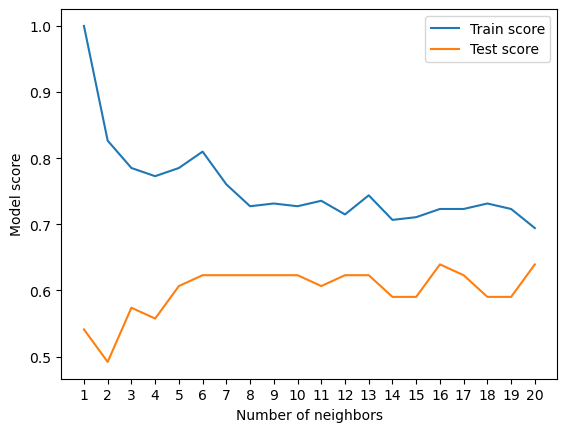

In [31]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

##### Tuning of hyperparameter of logistic regression

In [32]:
log_res_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_lead":np.arange(1,20,2)
        }
from sklearn.model_selection import RandomizedSearchCV

In [33]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_res_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(x_test,y_test)

0.8360655737704918

#### Evaluation

In [58]:
y_preds=gs_log_reg.predict(x_test)

Text(0, 0.5, 'True Positive Rate')

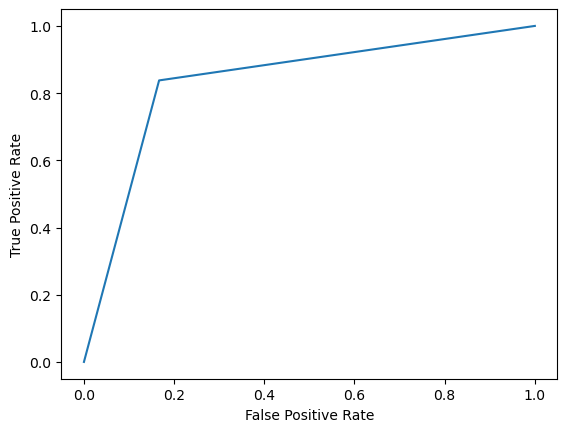

In [60]:
fpr, tpr, thresholds = roc_curve(np.array(y_test), y_preds)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [61]:
print(confusion_matrix(y_test,y_preds))

[[20  4]
 [ 6 31]]


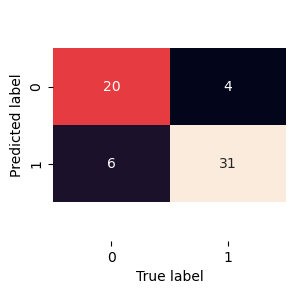

In [70]:

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(y_test,y_preds)

In [72]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.89      0.84      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



##### Calculation of evaluation metrics using Cross validation

In [74]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [77]:
from sklearn.model_selection import cross_val_score
clf=LogisticRegression(C=0.1082636733874054,solver="liblinear")

In [78]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")

In [80]:
cv_acc=np.mean(cv_acc)

In [85]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

0.8191596638655462

In [87]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall=np.mean(cv_recall)
cv_recall

0.9090909090909092

In [88]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1=np.mean(cv_f1)
cv_f1

0.8607249810576448

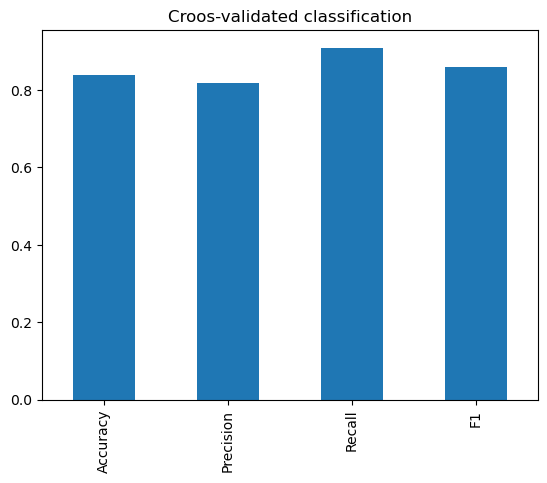

In [93]:
cv_metrics=pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Croos-validated classification",legend=False);

In [98]:
clf=LogisticRegression(C=0.1082636733874054,solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [99]:
clf.coef_

array([[ 0.00946743, -0.62361674,  0.64277283, -0.01662535, -0.00347241,
        -0.08264276,  0.16627983,  0.02651833, -0.43600663, -0.46474222,
         0.36822438, -0.5734088 , -0.52492432]])

In [104]:
feature_dict=dict(zip(data.columns,list(clf.coef_[0])))

In [105]:
feature_dict

{'age': 0.009467430391093715,
 'sex': -0.6236167373356041,
 'cp': 0.6427728347927745,
 'trestbps': -0.016625347511345475,
 'chol': -0.0034724058032637797,
 'fbs': -0.08264275826330326,
 'restecg': 0.1662798294766479,
 'thalach': 0.026518327335568217,
 'exang': -0.43600663309258475,
 'oldpeak': -0.4647422191440933,
 'slope': 0.36822438134259006,
 'ca': -0.5734088023880725,
 'thal': -0.5249243189422401}

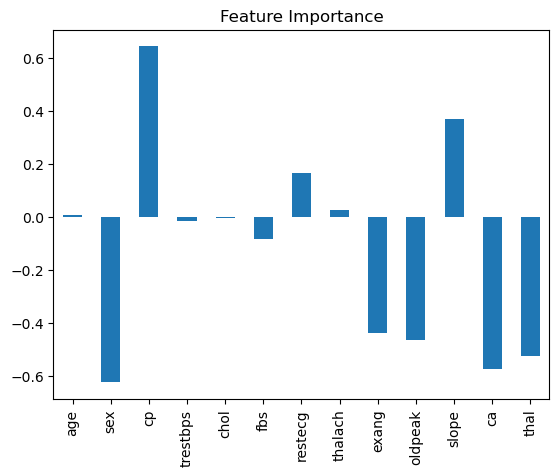

In [108]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);